In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [33]:
df = pd.read_csv("../StateData/ArkansasData/AR_2022_prim_l2_vf_2020blocks/AR_2022_prim_l2_vf_2020blocks.csv")

In [34]:

# Dictionary for renaming
rename_dict = {
    'r20220621': 'Runoff_2022',
    'p20220524': 'Primary_2022',
    'g20201103': 'General_2020',
    'r20200331': 'Runoff_2020',
    'pp20200303': 'PresPrimary_2020',
    'p20200303': 'Primary_2020',
    'g20181106': 'General_2018',
    'r20181106': 'RunoffNov_2018',
    'r20180619': 'RunoffJun_2018',
    'p20180522': 'Primary_2018',
    'r20180313': 'RunoffMar_2018',
    's20180213': 'Special_2018',
    'g20161108': 'General_2016',
    'r20160322': 'Runoff_2016',
    'pp20160301': 'PresPrimary_2016',
    'p20160301': 'Primary_2016',
    's20150414': 'SpecialApr_2015',
    's20150113': 'SpecialJan_2015',
    'g20141104': 'General_2014',
    's20140610': 'SpecialJun_2014',
    'p20140520': 'Primary_2014',
    's20140520': 'SpecialMay_2014',
    'g20121106': 'General_2012',
    'pp20120522': 'PresPrimary_2012',
    'p20120522': 'Primary_2012',
    's20111108': 'Special_2011',
    'g20101102': 'General_2010',
    'p20100518': 'Primary_2010'
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# # Save the updated dataset
# df.to_csv("voter_data_renamed.csv", index=False)

# Filter out blocks with no registered voters
df_active = df[df['total_reg'] > 0]

In [35]:
# 1. Calculate turnout rates for the 2020 General Election
df_active['turnout_2020'] = df_active['General_2020'] / df_active['total_reg'] * 100

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/657568094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['turnout_2020'] = df_active['General_2020'] / df_active['total_reg'] * 100


In [36]:
# 2. Calculate party proportions
df_active['pct_rep'] = df_active['party_rep'] / df_active['total_reg'] * 100
df_active['pct_dem'] = df_active['party_dem'] / df_active['total_reg'] * 100
df_active['pct_npp'] = df_active['party_npp'] / df_active['total_reg'] * 100

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/3997642289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['pct_rep'] = df_active['party_rep'] / df_active['total_reg'] * 100
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/3997642289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['pct_dem'] = df_active['party_dem'] / df_active['total_reg'] * 100
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/3997642289.py:4: SettingWithCopyWarni

In [37]:
# 5. Summary statistics
print("Summary of Active Blocks:")
print(f"Total Blocks with Voters: {len(df_active)}")
print(f"Average Turnout in 2020 General: {df_active['turnout_2020'].mean():.2f}%")
print(f"Average % Republican: {df_active['pct_rep'].mean():.2f}%")
print(f"Average % Democratic: {df_active['pct_dem'].mean():.2f}%")
print(f"Average % Non-Partisan: {df_active['pct_npp'].mean():.2f}%")

Summary of Active Blocks:
Total Blocks with Voters: 82372
Average Turnout in 2020 General: 69.64%
Average % Republican: 37.47%
Average % Democratic: 25.23%
Average % Non-Partisan: 37.25%


In [38]:
cvap_file = "../StateData/ArkansasData/ar_cvap_2022_2020_b/ar_cvap_2022_2020_b.csv"
df_cvap = pd.read_csv(cvap_file)

In [39]:
df_cvap['GEOID20'] = df_cvap['GEOID20'].astype(str)

# Filter out blocks with no CVAP (unpopulated blocks)
df_cvap = df_cvap[df_cvap['CVAP_TOT22'] > 0]

In [40]:
# Fix GEOID20 formatting (pad to 15 digits)
# Ensure GEOID20 is a string and pad with leading zeros if necessary
df_cvap['GEOID20'] = df_cvap['GEOID20'].str.zfill(15)

In [41]:
#Verify that CVAP totals add up correctly
df_cvap['cvap_sum_check'] = (df_cvap['CVAP_NHS22'] + df_cvap['CVAP_HSP22'])
print("\nBlocks where CVAP total doesn't match sum of Non-Hispanic and Hispanic:")
print(df_cvap[df_cvap['CVAP_TOT22'] != df_cvap['cvap_sum_check']][['GEOID20', 'CVAP_TOT22', 'CVAP_NHS22', 'CVAP_HSP22']])


Blocks where CVAP total doesn't match sum of Non-Hispanic and Hispanic:
                GEOID20  CVAP_TOT22  CVAP_NHS22  CVAP_HSP22
2       051190043072015        1854        1708         134
3       051190042204001         939         948           0
4       050590205002029        2303        2245          56
5       050774701001024        1435        1425          14
6       051239606003036        1278        1143         139
...                 ...         ...         ...         ...
136393  050014801001040          30          29           0
136398  050014801001032           2           1           3
136400  050014801001029           5           4           3
136405  050014801001020           7           6           0
136418  050014801001004          60          59           0

[39467 rows x 4 columns]


In [42]:
df_cvap['discrepancy'] = df_cvap['CVAP_TOT22'] - (df_cvap['CVAP_NHS22'] + df_cvap['CVAP_HSP22'])
print("\nDiscrepancy statistics:")
print(df_cvap['discrepancy'].describe())
print("\nAbsolute discrepancy statistics:")
print(df_cvap['discrepancy'].abs().describe())


Discrepancy statistics:
count    85669.000000
mean        -0.000595
std          3.205410
min        -95.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        501.000000
Name: discrepancy, dtype: float64

Absolute discrepancy statistics:
count    85669.000000
mean         1.002008
std          3.044770
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        501.000000
Name: discrepancy, dtype: float64


In [43]:
# Extract Census Tract (first 11 digits of GEOID20)
df_cvap['census_tract'] = df_cvap['GEOID20'].str[:11]

In [44]:
# Verify the Census Tract column
print("\nSample census_tract values:", df_cvap['census_tract'].head())
print("Number of unique Census Tracts:", df_cvap['census_tract'].nunique())


Sample census_tract values: 0    05079960600
1    05079960600
2    05119004307
3    05119004220
4    05059020500
Name: census_tract, dtype: object
Number of unique Census Tracts: 822


In [45]:
# Step 4: Group blocks into Census Tracts
tract_cvap = df_cvap.groupby('census_tract').agg({
    'CVAP_TOT22': 'sum',
    'CVAP_WHT22': 'sum',
    'CVAP_BLK22': 'sum',
    'CVAP_HSP22': 'sum',
    'CVAP_ASN22': 'sum',
    'CVAP_AIA22': 'sum'
}).reset_index()

In [46]:
# Calculate CVAP proportions at the Census Tract level
tract_cvap['pct_white'] = tract_cvap['CVAP_WHT22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_black'] = tract_cvap['CVAP_BLK22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_hispanic'] = tract_cvap['CVAP_HSP22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_asian'] = tract_cvap['CVAP_ASN22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_ami'] = tract_cvap['CVAP_AIA22'] / tract_cvap['CVAP_TOT22'] * 100

In [47]:
# Identify potential minority opportunity districts
# Flag Census Tracts where minority CVAP is >30%
tract_cvap['black_opportunity'] = tract_cvap['pct_black'] > 30
tract_cvap['hispanic_opportunity'] = tract_cvap['pct_hispanic'] > 30
tract_cvap['asian_opportunity'] = tract_cvap['pct_asian'] > 30
tract_cvap['ami_opportunity'] = tract_cvap['pct_ami'] > 30

In [48]:
# Print results
print("\nCensus Tracts with potential Black opportunity districts:")
print(tract_cvap[tract_cvap['black_opportunity']][['census_tract', 'pct_black', 'CVAP_TOT22']])

print("\nCensus Tracts with potential Hispanic opportunity districts:")
print(tract_cvap[tract_cvap['hispanic_opportunity']][['census_tract', 'pct_hispanic', 'CVAP_TOT22']])

print("\nCensus Tracts with potential Asian opportunity districts:")
print(tract_cvap[tract_cvap['asian_opportunity']][['census_tract', 'pct_asian', 'CVAP_TOT22']])

print("\nCensus Tracts with potential American Indian/Alaska Native opportunity districts:")
print(tract_cvap[tract_cvap['ami_opportunity']][['census_tract', 'pct_ami', 'CVAP_TOT22']])


Census Tracts with potential Black opportunity districts:
    census_tract  pct_black  CVAP_TOT22
3    05001480400  68.328267        1645
4    05001480500  32.604736        2745
11   05003960400  37.610619        1130
13   05003960600  36.386139        4040
90   05011950200  31.407407        1350
..           ...        ...         ...
730  05139950600  43.093923        2715
731  05139950700  33.697348        3205
733  05139950900  71.130952        1680
734  05139951000  69.710807        3285
815  05147490200  34.710744        1815

[179 rows x 3 columns]

Census Tracts with potential Hispanic opportunity districts:
    census_tract  pct_hispanic  CVAP_TOT22
30   05007020205     35.044248        2825
31   05007020206     44.827586        3770
80   05007021408     30.961792        3795
92   05011950400     30.645161        1240
711  05133080300     31.150442        2825
751  05143010201     34.897361        1705
752  05143010202     46.009390        1065
755  05143010305     44.409449 

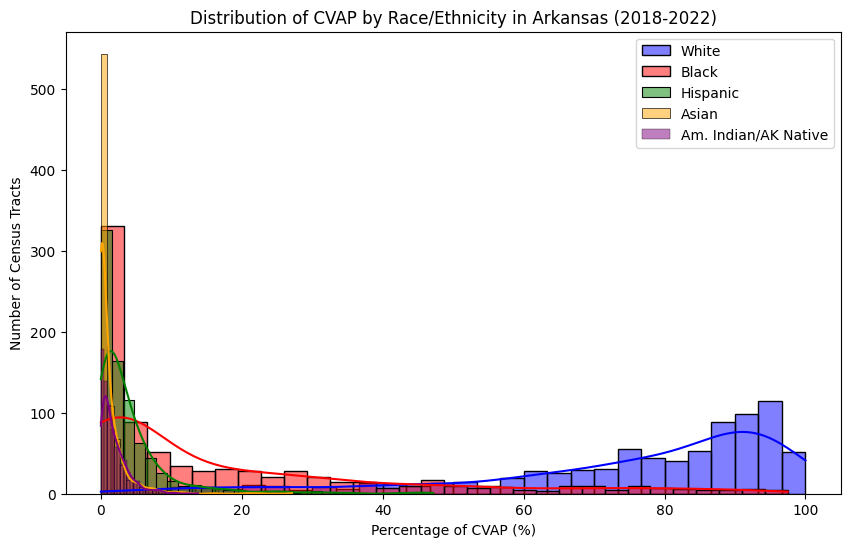

In [49]:
# Step 7: Visualize the distribution of CVAP by race/ethnicity
plt.figure(figsize=(10, 6))
sns.histplot(tract_cvap['pct_white'], bins=30, color='blue', alpha=0.5, label='White', kde=True)
sns.histplot(tract_cvap['pct_black'], bins=30, color='red', alpha=0.5, label='Black', kde=True)
sns.histplot(tract_cvap['pct_hispanic'], bins=30, color='green', alpha=0.5, label='Hispanic', kde=True)
sns.histplot(tract_cvap['pct_asian'], bins=30, color='orange', alpha=0.5, label='Asian', kde=True)
sns.histplot(tract_cvap['pct_ami'], bins=30, color='purple', alpha=0.5, label='Am. Indian/AK Native', kde=True)
plt.xlabel('Percentage of CVAP (%)')
plt.ylabel('Number of Census Tracts')
plt.title('Distribution of CVAP by Race/Ethnicity in Arkansas (2018-2022)')
plt.legend()
plt.show()

In [50]:
# Step 8: Summary statistics at the Census Tract level
print("\nSummary statistics for CVAP proportions by Census Tract:")
print(tract_cvap[['pct_white', 'pct_black', 'pct_hispanic', 'pct_asian', 'pct_ami']].describe())


Summary statistics for CVAP proportions by Census Tract:
        pct_white   pct_black  pct_hispanic   pct_asian     pct_ami
count  822.000000  822.000000    822.000000  822.000000  822.000000
mean    74.705947   17.861566      4.194211    1.184047    1.901420
std     23.224658   23.706899      6.103623    2.322923    1.926898
min      0.000000    0.000000      0.000000    0.000000    0.000000
25%     64.459230    1.153457      0.807890    0.000000    0.541910
50%     82.962211    6.078465      2.350639    0.297561    1.296563
75%     92.268293   26.514011      5.017773    1.445409    2.682221
max    100.000000   97.512438     47.163121   27.126437   13.793103


In [51]:
# Step 1: Load the rook and queen adjacency files for Census Tracts
rook_file = "../StateData/ArkansasData/ar_census_2020_adjacencies/ar_t_2020_rook_adjacency.csv"
queen_file = "../StateData/ArkansasData/ar_census_2020_adjacencies/ar_t_2020_queen_adjacency.csv"

df_rook = pd.read_csv(rook_file)
df_queen = pd.read_csv(queen_file)

# Step 2: Ensure GEOID20 is a string and padded to 15 digits
df_rook['GEOID20'] = df_rook['GEOID20'].astype(str).str.zfill(11)
df_queen['GEOID20'] = df_queen['GEOID20'].astype(str).str.zfill(11)

# Step 3: Parse ADJ_GEOMS into lists (assuming string format like '[GEOID1, GEOID2]')
df_rook['ADJ_GEOMS'] = df_rook['ADJ_GEOMS'].apply(eval)  # Convert string to list
df_queen['ADJ_GEOMS'] = df_queen['ADJ_GEOMS'].apply(eval)  # Convert string to list

# Step 4: Verify the data
print("Rook Adjacency - First few rows:")
print(df_rook.head())
print("\nQueen Adjacency - First few rows:")
print(df_queen.head())

# Step 5: Calculate number of adjacent tracts (internal connections)
df_rook['num_adjacent'] = df_rook['ADJ_GEOMS'].apply(len)
df_queen['num_adjacent'] = df_queen['ADJ_GEOMS'].apply(len)

print("\nRook Adjacency - Summary of adjacent tracts:")
print(df_rook['num_adjacent'].describe())
print("\nQueen Adjacency - Summary of adjacent tracts:")
print(df_queen['num_adjacent'].describe())


Rook Adjacency - First few rows:
       GEOID20                                          ADJ_GEOMS
0  05001480100  [05001480800, 05001480600, 05001480200, 050014...
1  05001480200  [05069002300, 05117460200, 05001480800, 050014...
2  05001480300  [05001480200, 05001480500, 05001480400, 051174...
3  05001480400  [05117460200, 05001480200, 05001480500, 050014...
4  05001480500            [05001480200, 05001480400, 05001480300]

Queen Adjacency - First few rows:
       GEOID20                                          ADJ_GEOMS
0  05001480100  [05001480800, 05001480600, 05001480200, 050014...
1  05001480200  [05069002300, 05117460200, 05001480800, 050014...
2  05001480300  [05001480200, 05001480500, 05001480400, 051174...
3  05001480400  [05117460200, 05001480200, 05001480500, 050014...
4  05001480500            [05001480200, 05001480400, 05001480300]

Rook Adjacency - Summary of adjacent tracts:
count    823.000000
mean       5.443499
std        1.820110
min        1.000000
25%        4.0

## 2021 Final Approved Congressional District

Dataset Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         4 non-null      int32   
 1   DISTRICT   4 non-null      object  
 2   DISTRICTN  4 non-null      int64   
 3   geometry   4 non-null      geometry
dtypes: geometry(1), int32(1), int64(1), object(1)
memory usage: 240.0+ bytes
None

First few rows:
   ID DISTRICT  DISTRICTN                                           geometry
0   1        1          1  POLYGON ((-91.8496 34.09321, -91.84596 34.0933...
1   2        2          2  POLYGON ((-92.80842 34.57716, -92.80841 34.577...
2   3        3          3  POLYGON ((-94.13968 35.12895, -94.14129 35.128...
3   4        4          4  POLYGON ((-94.4398 35.16354, -94.43977 35.1642...

Coordinate Reference System: EPSG:4269


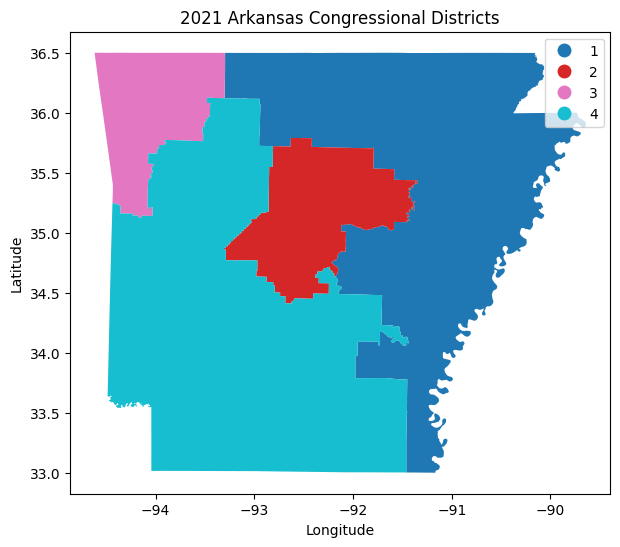

In [52]:
import geopandas as gpd

# Step 1: Load the shapefile
shapefile_path = "../StateData/ArkansasData/ar_cong_2021/ak_cong_2021.shp"  
gdf_districts = gpd.read_file(shapefile_path)

# Step 2: Inspect the data
print("Dataset Info:")
print(gdf_districts.info())
print("\nFirst few rows:")
print(gdf_districts.head())

# Step 3: Check the coordinate system
print("\nCoordinate Reference System:", gdf_districts.crs)

# Step 4: Plot the districts (basic visualization)
gdf_districts.plot(column='DISTRICT', cmap='tab10', legend=True, figsize=(10, 6))
plt.title("2021 Arkansas Congressional Districts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## 2020 Census Tract Boundaries



In [53]:
# Load the Census Tract shapefile
tract_shapefile = "../StateData/ArkansasData/ar_t_2020_bound/ar_t_2020_bound.shp"  # Path to the .shp file
gdf_tract_shapes = gpd.read_file(tract_shapefile)

In [54]:
# Inspect the shapefile
print("Census Tract Shapefile Info:")
print(gdf_tract_shapes.info())
print("\nFirst few rows of Census Tract Shapefile:")
print(gdf_tract_shapes.head())
print("\nCoordinate Reference System (CRS):")
print(gdf_tract_shapes.crs)
print("\nNumber of Census Tracts:")
print(len(gdf_tract_shapes))

Census Tract Shapefile Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP20   823 non-null    object  
 1   COUNTYFP20  823 non-null    object  
 2   TRACTCE20   823 non-null    object  
 3   GEOID20     823 non-null    object  
 4   NAME20      823 non-null    object  
 5   NAMELSAD20  823 non-null    object  
 6   MTFCC20     823 non-null    object  
 7   FUNCSTAT20  823 non-null    object  
 8   ALAND20     823 non-null    int64   
 9   AWATER20    823 non-null    int64   
 10  INTPTLAT20  823 non-null    object  
 11  INTPTLON20  823 non-null    object  
 12  geometry    823 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 83.7+ KB
None

First few rows of Census Tract Shapefile:
  STATEFP20 COUNTYFP20 TRACTCE20      GEOID20 NAME20    NAMELSAD20 MTFCC20  \
0        05        111    490200  051

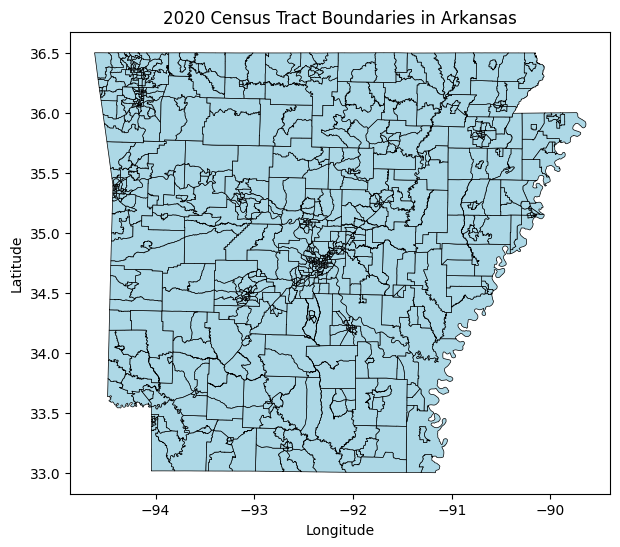

In [55]:
# Visualize the Census Tract boundaries
gdf_tract_shapes.plot(figsize=(10, 6), color='lightblue', edgecolor='black', linewidth=0.5)
plt.title("2020 Census Tract Boundaries in Arkansas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Summary Statistics for Number of Neighbors per Tract:
count    823.000000
mean       5.902795
std        1.957649
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       13.000000
Name: num_neighbors, dtype: float64


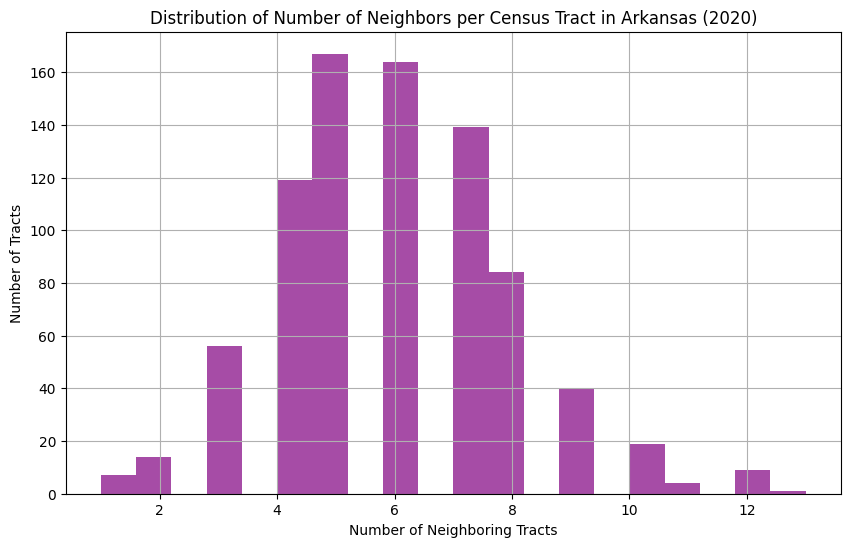

In [56]:
# Step 3: Estimate Number of Neighboring Tracts
# Create a spatial index for faster neighbor detection
gdf_tract_shapes_sindex = gdf_tract_shapes.sindex

# Function to count neighbors for each tract
def count_neighbors(row, gdf, sindex):
    geom = row['geometry']
    possible_matches_index = list(sindex.intersection(geom.bounds))
    possible_matches = gdf.iloc[possible_matches_index]
    neighbors = possible_matches[
        (possible_matches.index != row.name) & 
        (possible_matches['geometry'].touches(geom))
    ]
    return len(neighbors)

# Apply the function to count neighbors
gdf_tract_shapes['num_neighbors'] = gdf_tract_shapes.apply(
    lambda row: count_neighbors(row, gdf_tract_shapes, gdf_tract_shapes_sindex), axis=1
)

# Summary statistics for number of neighbors
print("\nSummary Statistics for Number of Neighbors per Tract:")
print(gdf_tract_shapes['num_neighbors'].describe())

# Visualize the distribution of number of neighbors
plt.figure(figsize=(10, 6))
gdf_tract_shapes['num_neighbors'].hist(bins=20, color='purple', alpha=0.7)
plt.title("Distribution of Number of Neighbors per Census Tract in Arkansas (2020)")
plt.xlabel("Number of Neighboring Tracts")
plt.ylabel("Number of Tracts")
plt.show()


Summary Statistics for Number of Tracts per County:
count     75.000000
mean      10.973333
std       15.280241
min        2.000000
25%        4.000000
50%        6.000000
75%       10.000000
max      107.000000
Name: num_tracts, dtype: float64


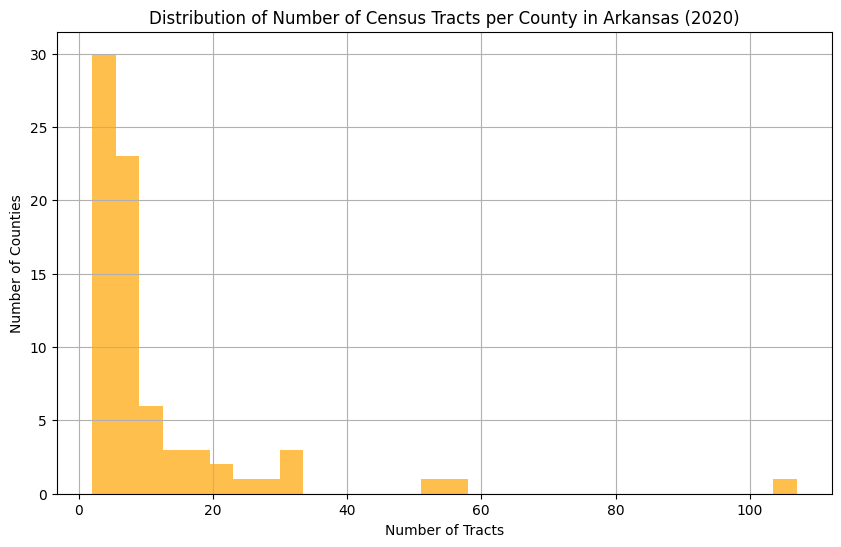

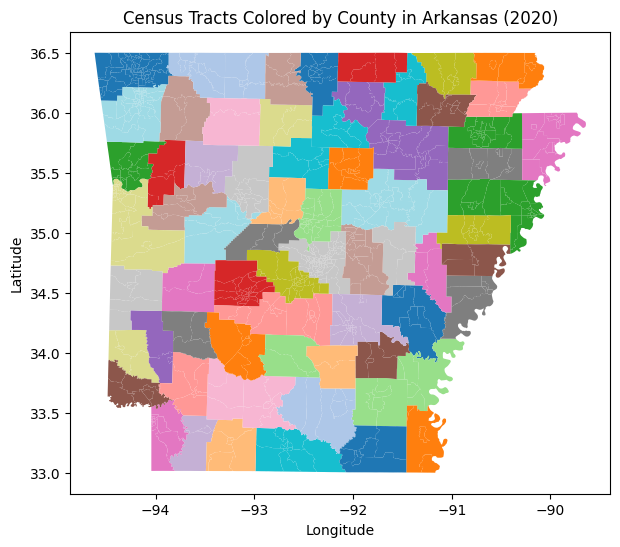

In [57]:
# Step 4: Spatial Distribution by County
# Count the number of tracts per county
tracts_per_county = gdf_tract_shapes.groupby('COUNTYFP20').size().reset_index(name='num_tracts')

# Summary statistics for tracts per county
print("\nSummary Statistics for Number of Tracts per County:")
print(tracts_per_county['num_tracts'].describe())

# Visualize the number of tracts per county
plt.figure(figsize=(10, 6))
tracts_per_county['num_tracts'].hist(bins=30, color='orange', alpha=0.7)
plt.title("Distribution of Number of Census Tracts per County in Arkansas (2020)")
plt.xlabel("Number of Tracts")
plt.ylabel("Number of Counties")
plt.show()

# Map tracts colored by county
gdf_tract_shapes.plot(column='COUNTYFP20', cmap='tab20', legend=False, figsize=(10, 6))
plt.title("Census Tracts Colored by County in Arkansas (2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/3665689634.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_tract_shapes['centroid'] = gdf_tract_shapes['geometry'].centroid
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/3665689634.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf[gdf.index != row.name]['centroid'].distance(centroid)
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/3665689634.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf[gdf.index != row.name]['centroid'].dis


Summary Statistics for Nearest Neighbor Distance (degrees):
count    823.000000
mean       0.066944
std        0.054094
min        0.007693
25%        0.021503
50%        0.047320
75%        0.101794
max        0.260543
Name: nn_distance, dtype: float64


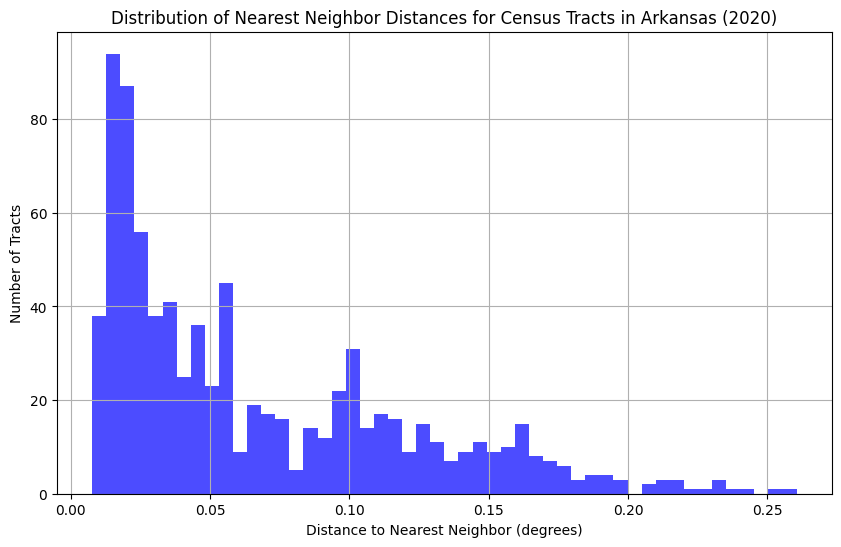

In [58]:
# Step 5: Explore Spatial Clustering
# Calculate the centroid of each tract
gdf_tract_shapes['centroid'] = gdf_tract_shapes['geometry'].centroid

# Function to find distance to nearest neighbor
def nearest_neighbor_distance(row, gdf):
    centroid = row['centroid']
    distances = gdf[gdf.index != row.name]['centroid'].distance(centroid)
    return distances.min() if not distances.empty else 0

# Compute nearest neighbor distance for each tract
gdf_tract_shapes['nn_distance'] = gdf_tract_shapes.apply(
    lambda row: nearest_neighbor_distance(row, gdf_tract_shapes), axis=1
)

# Summary statistics for nearest neighbor distances
print("\nSummary Statistics for Nearest Neighbor Distance (degrees):")
print(gdf_tract_shapes['nn_distance'].describe())

# Visualize the distribution of nearest neighbor distances
plt.figure(figsize=(10, 6))
gdf_tract_shapes['nn_distance'].hist(bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Nearest Neighbor Distances for Census Tracts in Arkansas (2020)")
plt.xlabel("Distance to Nearest Neighbor (degrees)")
plt.ylabel("Number of Tracts")
plt.show()


Summary Statistics for Perimeter-to-Area Ratio (Tracts):
count    8.230000e+02
mean     1.196891e-08
std      9.562411e-09
min      1.338410e-09
25%      3.931327e-09
50%      8.989324e-09
75%      1.798235e-08
max      5.310194e-08
Name: pa_ratio, dtype: float64


/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98558/2334586119.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_tract_shapes['perimeter_m'] = gdf_tract_shapes['geometry'].length


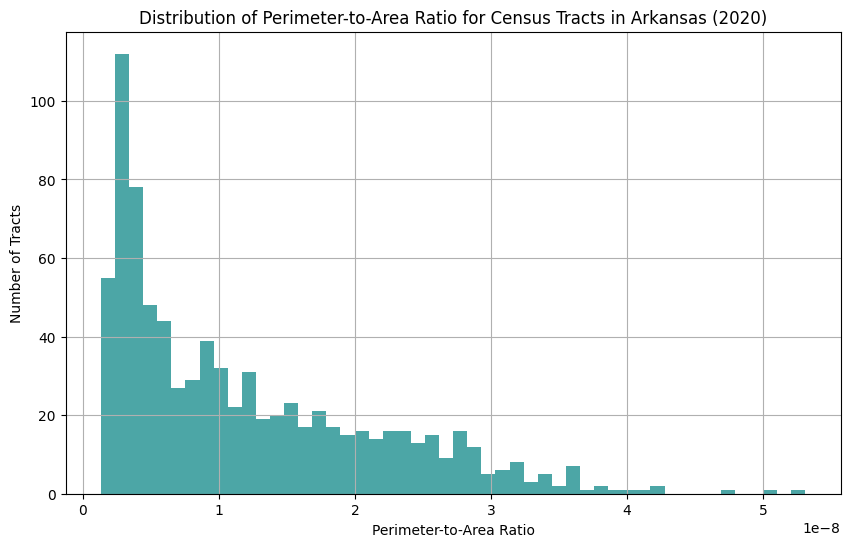

In [59]:
gdf_tract_shapes['perimeter_m'] = gdf_tract_shapes['geometry'].length
# Convert area to square meters for ratio calculation
gdf_tract_shapes['area_sqm'] = gdf_tract_shapes['ALAND20']

# Compute perimeter-to-area ratio (perimeter in meters / area in square meters)
gdf_tract_shapes['pa_ratio'] = gdf_tract_shapes['perimeter_m'] / gdf_tract_shapes['area_sqm']

# Summary statistics for perimeter-to-area ratio
print("\nSummary Statistics for Perimeter-to-Area Ratio (Tracts):")
print(gdf_tract_shapes['pa_ratio'].describe())

# Visualize the distribution
plt.figure(figsize=(10, 6))
gdf_tract_shapes['pa_ratio'].hist(bins=50, color='teal', alpha=0.7)
plt.title("Distribution of Perimeter-to-Area Ratio for Census Tracts in Arkansas (2020)")
plt.xlabel("Perimeter-to-Area Ratio")
plt.ylabel("Number of Tracts")
plt.show()

<Figure size 1000x600 with 0 Axes>

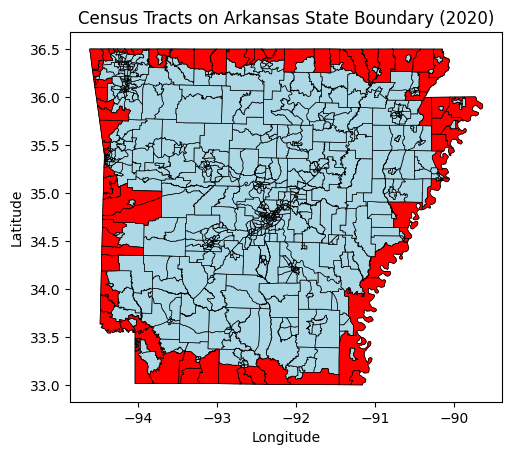


Number of Tracts on State Boundary (Improved):
95

Boundary Tracts by County:
   COUNTYFP20  num_boundary_tracts
0         003                    1
1         005                    3
2         007                   13
3         009                    2
4         015                    3
5         017                    2
6         021                    3
7         027                    3
8         031                    1
9         033                    3
10        035                    3
11        041                    1
12        049                    3
13        055                    2
14        073                    1
15        077                    1
16        081                    4
17        089                    2
18        091                    7
19        093                    7
20        107                    3
21        113                    4
22        121                    3
23        127                    2
24        131                    9
25        1

In [60]:
# Step 2.1: Identify Tracts on State Boundary (Improved)

# Dissolve all tracts to create a single state geometry
state_geometry = gdf_tract_shapes.dissolve().geometry.iloc[0]

# Extract the state boundary
state_boundary = state_geometry.boundary

# Identify tracts that intersect or touch the state boundary
gdf_tract_shapes['on_state_boundary'] = gdf_tract_shapes['geometry'].apply(
    lambda geom: geom.intersects(state_boundary) or geom.touches(state_boundary)
)

# Filter boundary tracts
state_boundary_tracts = gdf_tract_shapes[gdf_tract_shapes['on_state_boundary']]

# Visualize state boundary tracts
plt.figure(figsize=(10, 6))
gdf_tract_shapes.plot(color='lightblue', edgecolor='black', linewidth=0.5)
state_boundary_tracts.plot(ax=plt.gca(), color='red', edgecolor='black', linewidth=0.5)
plt.title("Census Tracts on Arkansas State Boundary (2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Count boundary tracts
print("\nNumber of Tracts on State Boundary (Improved):")
print(len(state_boundary_tracts))

# Summary of boundary tracts by county
boundary_tracts_by_county = state_boundary_tracts.groupby('COUNTYFP20').size().reset_index(name='num_boundary_tracts')
print("\nBoundary Tracts by County:")
print(boundary_tracts_by_county)

In [61]:
# # === Code to Inspect DataFrames ===

# print("--- Original DataFrame Info (df) ---")
# if 'df' in locals() or 'df' in globals():
#     print("Columns in df:", df.columns.tolist())
#     print("\nFirst 3 rows of df:")
#     print(df.head(3))
#     print("\nData types in df:")
#     print(df.info())
# else:
#     print("DataFrame 'df' not found.")

# print("\n\n--- Active Voter DataFrame Info (df_active) ---")
# if 'df_active' in locals() or 'df_active' in globals():
#     print("Columns in df_active:", df_active.columns.tolist())
#     print("\nData types in df_active:")
#     # Using .info() provides a concise summary of columns and types
#     print(df_active.info())
#     print("\nFirst 5 rows of df_active (to see column content):")
#     print(df_active.head(5))
# else:
#     print("DataFrame 'df_active' not found.")

# print("\n\n--- Checking for potential Block ID columns ---")
# potential_cols = []
# if 'df_active' in locals() or 'df_active' in globals():
#     for col in df_active.columns:
#         # Look for columns likely containing GEOIDs (long strings/numbers, common names)
#         if 'GEOID' in col.upper() or 'BLOCK' in col.upper() or 'FIPS' in col.upper() or col.upper() == 'ID':
#             potential_cols.append(col)
#             # Check a sample value's length from the first non-null entry
#             try:
#                 first_val = df_active[col].dropna().iloc[0]
#                 # Check length only if it's likely a string or can be converted
#                 if isinstance(first_val, (str, int, float)):
#                    val_str = str(first_val)
#                    # Remove potential decimal points for numeric types before checking length
#                    if '.' in val_str:
#                        val_str = val_str.split('.')[0]
#                    print(f"Potential Column: '{col}', Example Value: '{first_val}', Approx Length: {len(val_str)}")
#                 else:
#                    print(f"Potential Column: '{col}', Example Value: '{first_val}', Type: {type(first_val)}")

#             except IndexError:
#                 print(f"Potential Column: '{col}' (Column appears empty or all NaN)")
#             except Exception as e:
#                  print(f"Potential Column: '{col}' - Error checking value: {e}")


#     if not potential_cols:
#         print("No obvious potential Block ID columns found based on common names.")
# else:
#     print("DataFrame 'df_active' not found for checking.")

# # === End of Inspection Code ===


Aggregating block-level voter data to Census Tracts...
Aggregated voter data for 823 tracts.
  census_tract  total_reg_tract  party_dem_tract  party_rep_tract  \
0  05001480100            653.0            191.0            286.0   
1  05001480200            820.0            168.0            372.0   
2  05001480300           1355.0            306.0            559.0   
3  05001480400            914.0            330.0            133.0   
4  05001480500           1805.0            408.0            711.0   

   party_npp_tract  voted_general_2020_tract  estimated_dem_votes_tract  \
0            176.0                     484.0                 139.712508   
1            280.0                     610.0                 118.722877   
2            490.0                     989.0                 218.090131   
3            450.0                     582.0                 213.417103   
4            686.0                    1303.0                 298.275072   

   estimated_rep_votes_tract  
0        

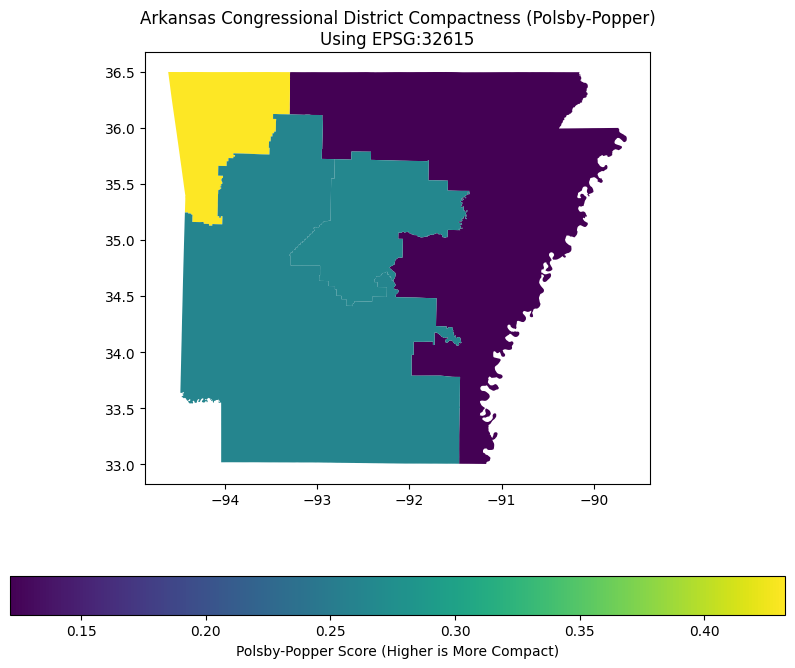


Calculating Efficiency Gap based on estimated 2020 General Election votes...

--- Efficiency Gap Results (Estimated 2020 General Election) ---
   DISTRICT  Dem_Votes  Rep_Votes  Total_Votes  Wasted_Dem_Votes  \
0         1    60167.0   116585.0     176752.0           60167.0   
1         2    71948.0    91597.0     163545.0           71948.0   
2         3    53077.0   105861.0     158938.0           53077.0   
3         4    82507.0   139398.0     221905.0           82507.0   

   Wasted_Rep_Votes  
0           28208.0  
1            9824.0  
2           26391.0  
3           28445.0  

Statewide Estimated Dem Votes: 267,699
Statewide Estimated Rep Votes: 453,441
Statewide Total Estimated Votes (Dem+Rep): 721,140
Total Wasted Dem Votes: 267,699
Total Wasted Rep Votes: 92,868

Efficiency Gap: -0.2424
(Positive favors Democrats, Negative favors Republicans)
The gap suggests an advantage for the Republican party by 24.24%.

--- Gerrymandering Metrics Summary ---
Compactness (Polsby-Popp

In [64]:
import numpy as np

# === Gerrymandering Score Calculation ===

# --- Configuration ---
# Set based on the inspection output
BLOCK_ID_COLUMN = 'geoid20'
# Target CRS for accurate area/length calculations (Choose one appropriate for Arkansas)
# Example: NAD83 / Arkansas South (ftUS) - EPSG:3082
# Example: UTM Zone 15N (meters) - EPSG:32615
TARGET_CRS = "EPSG:32615" # Using UTM 15N for metric calculations

# --- Step 1: Prepare Block-Level Voter Data for Aggregation ---

# Check if the block ID column exists (should pass now)
if BLOCK_ID_COLUMN not in df_active.columns:
    raise KeyError(f"Column '{BLOCK_ID_COLUMN}' not found in the voter data DataFrame (df_active).")

# Ensure Block ID is string type for consistency
# Use .loc to avoid SettingWithCopyWarning if df_active wasn't copied earlier
df_active.loc[:, BLOCK_ID_COLUMN] = df_active[BLOCK_ID_COLUMN].astype(str)

# Extract Census Tract ID (first 11 digits of the 15-digit Block GEOID20)
# Ensure the block ID is padded correctly if necessary before slicing
df_active.loc[:, 'census_tract'] = df_active[BLOCK_ID_COLUMN].str.zfill(15).str[:11]

# Calculate estimated votes based on 2020 General Election turnout and party registration
# Handle potential division by zero if total_reg is 0 (though df_active should filter this)
# Calculate proportions safely
rep_proportion = (df_active['party_rep'] / df_active['total_reg']).fillna(0)
dem_proportion = (df_active['party_dem'] / df_active['total_reg']).fillna(0)
npp_proportion = (df_active['party_npp'] / df_active['total_reg']).fillna(0)

# Assign estimated votes using .loc
df_active.loc[:, 'Estimated_Dem_Votes_2020'] = df_active['General_2020'] * dem_proportion
df_active.loc[:, 'Estimated_Rep_Votes_2020'] = df_active['General_2020'] * rep_proportion
df_active.loc[:, 'Estimated_NPP_Votes_2020'] = df_active['General_2020'] * npp_proportion


# --- Step 2: Aggregate Block Data to Census Tracts ---

print("\nAggregating block-level voter data to Census Tracts...")
# Ensure required columns exist before aggregation
required_agg_cols = ['census_tract', 'total_reg', 'party_dem', 'party_rep', 'party_npp',
                     'General_2020', 'Estimated_Dem_Votes_2020', 'Estimated_Rep_Votes_2020']
missing_cols = [col for col in required_agg_cols if col not in df_active.columns and col != 'census_tract']
if missing_cols:
    raise KeyError(f"Missing required columns for aggregation in df_active: {missing_cols}")


tract_voter_agg = df_active.groupby('census_tract').agg(
    total_reg_tract=('total_reg', 'sum'),
    party_dem_tract=('party_dem', 'sum'),
    party_rep_tract=('party_rep', 'sum'),
    party_npp_tract=('party_npp', 'sum'),
    voted_general_2020_tract=('General_2020', 'sum'),
    estimated_dem_votes_tract=('Estimated_Dem_Votes_2020', 'sum'),
    estimated_rep_votes_tract=('Estimated_Rep_Votes_2020', 'sum')
).reset_index()

print(f"Aggregated voter data for {len(tract_voter_agg)} tracts.")
print(tract_voter_agg.head())

# --- Step 3: Merge Tract-Level Data (Voter Aggregates, CVAP, Geometry) ---

print("\nMerging aggregated voter data, CVAP data, and tract geometries...")

# Ensure GEOID20/census_tract exists in gdf_tract_shapes for merging
# The previous code likely used GEOID20 from the shapefile. Let's ensure it's treated as the tract ID.
if 'GEOID20' in gdf_tract_shapes.columns:
     gdf_tract_shapes['census_tract'] = gdf_tract_shapes['GEOID20'].astype(str).str.zfill(11)
elif 'GEOID' in gdf_tract_shapes.columns: # Check for alternative name
     gdf_tract_shapes['census_tract'] = gdf_tract_shapes['GEOID'].astype(str).str.zfill(11)
elif 'census_tract' not in gdf_tract_shapes.columns: # If already created correctly earlier
     raise KeyError("Could not find or create 'census_tract' (11-digit ID) column in the tract shapefile GeoDataFrame.")


# Merge voter aggregates with tract_cvap (ensure tract_cvap also uses 'census_tract')
if 'census_tract' not in tract_cvap.columns:
    raise KeyError("Column 'census_tract' not found in tract_cvap DataFrame.")
gdf_tracts_merged = pd.merge(tract_voter_agg, tract_cvap, on='census_tract', how='left')


# Merge the combined data with tract geometries
# Use gdf_tract_shapes as the base for the GeoDataFrame
# Keep only tracts that have voter/CVAP data using 'inner' merge
gdf_tracts_merged = pd.merge(gdf_tract_shapes, gdf_tracts_merged, on='census_tract', how='inner')


print(f"Original number of tract shapes: {len(gdf_tract_shapes)}")
print(f"Number of tracts after merging voter and CVAP data: {len(gdf_tracts_merged)}")
if len(gdf_tracts_merged) == 0:
    raise ValueError("Merging resulted in an empty GeoDataFrame. Check merge keys ('census_tract') and data content.")
print(gdf_tracts_merged.head())

# --- Step 4: Align CRS and Perform Spatial Join ---

print("\nAligning Coordinate Reference Systems (CRS)...")
print(f"District CRS: {gdf_districts.crs}")
print(f"Tract CRS: {gdf_tracts_merged.crs}")

# Reproject tracts to match districts CRS BEFORE spatial join
if gdf_districts.crs != gdf_tracts_merged.crs:
    print(f"Reprojecting tracts CRS from {gdf_tracts_merged.crs} to {gdf_districts.crs} for spatial join...")
    gdf_tracts_merged = gdf_tracts_merged.to_crs(gdf_districts.crs)
    print(f"New Tract CRS: {gdf_tracts_merged.crs}")

print("\nPerforming spatial join to assign tracts to Congressional Districts...")
# Ensure the DISTRICT column in gdf_districts is suitable (use DISTRICT or DISTRICTN)
district_id_col = 'DISTRICT' # Or 'DISTRICTN' if that's the integer one
if district_id_col not in gdf_districts.columns:
     alt_cols = [c for c in ['DISTRICT', 'DISTRICTN', 'District'] if c in gdf_districts.columns]
     if not alt_cols:
         raise KeyError("Could not find a suitable District ID column in the districts GeoDataFrame.")
     district_id_col = alt_cols[0]
     print(f"Using district ID column: '{district_id_col}'")


# Perform join. Using 'predicate="intersects"' is generally safer for slight boundary mismatches.
gdf_tracts_with_district = gpd.sjoin(gdf_tracts_merged, gdf_districts[[district_id_col, 'geometry']],
                                     how='left', predicate='intersects', lsuffix='tract', rsuffix='dist')


# Check for tracts not assigned to a district
unassigned_tracts = gdf_tracts_with_district[gdf_tracts_with_district[district_id_col].isna()]
if not unassigned_tracts.empty:
    print(f"WARNING: {len(unassigned_tracts)} tracts could not be assigned to a district.")
    # print(unassigned_tracts[['census_tract', 'NAMELSAD20']]) # Print details if needed


# Remove tracts that couldn't be assigned (often slivers or water bodies)
# Also remove duplicate assignments if 'intersects' assigns a tract to multiple districts (keep first match)
gdf_tracts_with_district.dropna(subset=[district_id_col], inplace=True)
gdf_tracts_with_district = gdf_tracts_with_district.drop_duplicates(subset=['census_tract'], keep='first')


# Ensure DISTRICT ID is integer type
gdf_tracts_with_district[district_id_col] = gdf_tracts_with_district[district_id_col].astype(int)

print(f"Successfully assigned {len(gdf_tracts_with_district)} tracts to districts.")
print(gdf_tracts_with_district[['census_tract', district_id_col]].head())

# --- Step 5: Calculate District-Level Aggregates ---

print("\nAggregating tract data to the Congressional District level...")
# Define aggregation dictionary
agg_dict = {
    'total_reg_tract': 'sum',
    'party_dem_tract': 'sum',
    'party_rep_tract': 'sum',
    'party_npp_tract': 'sum',
    'voted_general_2020_tract': 'sum',
    'estimated_dem_votes_tract': 'sum',
    'estimated_rep_votes_tract': 'sum',
    'CVAP_TOT22': 'sum',
    'CVAP_WHT22': 'sum',
    'CVAP_BLK22': 'sum',
    'CVAP_HSP22': 'sum',
    'CVAP_ASN22': 'sum',
    'CVAP_AIA22': 'sum'
    # Add other CVAP groups if needed and available in tract_cvap
}

# Check if CVAP columns exist before aggregation
cvap_cols_to_agg = [k for k in agg_dict if 'CVAP' in k]
missing_cvap_cols = [c for c in cvap_cols_to_agg if c not in gdf_tracts_with_district.columns]
if missing_cvap_cols:
    print(f"Warning: CVAP columns missing in merged tract data, cannot aggregate: {missing_cvap_cols}")
    # Remove missing CVAP columns from agg_dict
    for col in missing_cvap_cols:
        del agg_dict[col]


# Perform the aggregation
district_aggregates = gdf_tracts_with_district.groupby(district_id_col).agg(agg_dict).reset_index()

# Merge aggregates back with district geometries for mapping and compactness
# Ensure the merge key (district_id_col) matches in both DataFrames
gdf_districts[district_id_col] = gdf_districts[district_id_col].astype(int)
gdf_districts_final = pd.merge(gdf_districts, district_aggregates, on=district_id_col, how='left')


# Handle potential districts with no assigned tracts (NaNs after left merge)
gdf_districts_final.fillna(0, inplace=True) # Fill NaN with 0 for calculations

print("District-level aggregates:")
print(gdf_districts_final[[district_id_col, 'total_reg_tract', 'estimated_dem_votes_tract', 'estimated_rep_votes_tract', 'CVAP_TOT22']].head())


# --- Step 6: Calculate Compactness Score (Polsby-Popper) ---

print(f"\nCalculating Polsby-Popper compactness scores...")
print(f"Original District CRS for calculation: {gdf_districts_final.crs}")

# Reproject to the chosen projected CRS for accurate area/perimeter
print(f"Reprojecting to {TARGET_CRS} for geometric calculations...")
try:
    gdf_districts_proj = gdf_districts_final.to_crs(TARGET_CRS)
    print(f"CRS after reprojection: {gdf_districts_proj.crs}")
except Exception as e:
    raise RuntimeError(f"Failed to reproject districts to {TARGET_CRS}. Error: {e}. Check if TARGET_CRS is valid.")


# Calculate Area and Perimeter in the projected CRS units (meters for EPSG:32615)
gdf_districts_proj['area'] = gdf_districts_proj.geometry.area
gdf_districts_proj['perimeter'] = gdf_districts_proj.geometry.length

# Calculate Polsby-Popper score: 4 * pi * Area / Perimeter^2
# Avoid division by zero if perimeter is somehow 0
gdf_districts_proj['polsby_popper'] = 0.0 # Initialize column
valid_perimeter = gdf_districts_proj['perimeter'] > 0
gdf_districts_proj.loc[valid_perimeter, 'polsby_popper'] = \
    (4 * np.pi * gdf_districts_proj.loc[valid_perimeter, 'area']) / (gdf_districts_proj.loc[valid_perimeter, 'perimeter']**2)

# Merge the score back to the original GeoDataFrame if needed, or just use gdf_districts_proj
gdf_districts_final['polsby_popper'] = gdf_districts_proj['polsby_popper']

print("Polsby-Popper Scores:")
print(gdf_districts_final[[district_id_col, 'polsby_popper']].round(4))

# Plot compactness scores
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_districts_final.plot(column='polsby_popper', ax=ax, legend=True,
                         legend_kwds={'label': "Polsby-Popper Score (Higher is More Compact)",
                                      'orientation': "horizontal"})
ax.set_title(f"Arkansas Congressional District Compactness (Polsby-Popper)\nUsing {TARGET_CRS}")
plt.show()

# --- Step 7: Calculate Efficiency Gap ---

print("\nCalculating Efficiency Gap based on estimated 2020 General Election votes...")

df_results = gdf_districts_final[[district_id_col, 'estimated_dem_votes_tract', 'estimated_rep_votes_tract']].copy()
df_results.rename(columns={'estimated_dem_votes_tract': 'Dem_Votes',
                           'estimated_rep_votes_tract': 'Rep_Votes',
                           district_id_col: 'DISTRICT'}, inplace=True) # Standardize district column name


# Calculate total votes per district (only considering estimated Dem/Rep)
df_results['Total_Votes'] = df_results['Dem_Votes'] + df_results['Rep_Votes']

# Calculate votes needed to win (50% + 1 vote)
# Use np.floor for correct handling if Total_Votes is odd
df_results['Win_Threshold'] = np.floor(df_results['Total_Votes'] / 2) + 1

# Calculate Wasted Votes
df_results['Wasted_Dem_Votes'] = 0.0
df_results['Wasted_Rep_Votes'] = 0.0

# Vectorized calculation for wasted votes
dem_wins = df_results['Dem_Votes'] > df_results['Rep_Votes']
rep_wins = df_results['Rep_Votes'] > df_results['Dem_Votes']
tie = df_results['Dem_Votes'] == df_results['Rep_Votes']

# Wasted votes for Dems
df_results.loc[dem_wins, 'Wasted_Dem_Votes'] = df_results['Dem_Votes'] - df_results['Win_Threshold']
df_results.loc[rep_wins | tie, 'Wasted_Dem_Votes'] = df_results['Dem_Votes']

# Wasted votes for Reps
df_results.loc[rep_wins, 'Wasted_Rep_Votes'] = df_results['Rep_Votes'] - df_results['Win_Threshold']
df_results.loc[dem_wins | tie, 'Wasted_Rep_Votes'] = df_results['Rep_Votes']

# Ensure wasted votes aren't negative (can happen with threshold calculation if votes=0 or 1)
df_results['Wasted_Dem_Votes'] = df_results['Wasted_Dem_Votes'].clip(lower=0)
df_results['Wasted_Rep_Votes'] = df_results['Wasted_Rep_Votes'].clip(lower=0)


# Calculate Statewide Totals
total_dem_votes = df_results['Dem_Votes'].sum()
total_rep_votes = df_results['Rep_Votes'].sum()
total_votes_statewide = df_results['Total_Votes'].sum()
total_wasted_dem = df_results['Wasted_Dem_Votes'].sum()
total_wasted_rep = df_results['Wasted_Rep_Votes'].sum()

# Calculate Efficiency Gap
# Formula: (Total Wasted Rep Votes - Total Wasted Dem Votes) / Total Statewide Votes
# Positive EG favors Democrats (Republicans waste more votes proportionally)
# Negative EG favors Republicans (Democrats waste more votes proportionally)
if total_votes_statewide > 0:
    efficiency_gap = (total_wasted_rep - total_wasted_dem) / total_votes_statewide
else:
    efficiency_gap = 0 # Avoid division by zero

print("\n--- Efficiency Gap Results (Estimated 2020 General Election) ---")
print(df_results[['DISTRICT', 'Dem_Votes', 'Rep_Votes', 'Total_Votes', 'Wasted_Dem_Votes', 'Wasted_Rep_Votes']].round(0))
print(f"\nStatewide Estimated Dem Votes: {total_dem_votes:,.0f}")
print(f"Statewide Estimated Rep Votes: {total_rep_votes:,.0f}")
print(f"Statewide Total Estimated Votes (Dem+Rep): {total_votes_statewide:,.0f}")
print(f"Total Wasted Dem Votes: {total_wasted_dem:,.0f}")
print(f"Total Wasted Rep Votes: {total_wasted_rep:,.0f}")
print(f"\nEfficiency Gap: {efficiency_gap:.4f}")
print(f"(Positive favors Democrats, Negative favors Republicans)")
if efficiency_gap < -0.0001: # Add tolerance for floating point
    print(f"The gap suggests an advantage for the Republican party by {abs(efficiency_gap):.2%}.")
elif efficiency_gap > 0.0001:
    print(f"The gap suggests an advantage for the Democratic party by {efficiency_gap:.2%}.")
else:
    print("The gap suggests no significant advantage for either party based on wasted votes.")

# --- Final Summary ---
print("\n--- Gerrymandering Metrics Summary ---")
print("Compactness (Polsby-Popper):")
# Make sure district_id_col is used here
print(gdf_districts_final[[district_id_col, 'polsby_popper']].round(4))
print("\nEfficiency Gap (Estimated 2020 General):")
print(f"  Value: {efficiency_gap:.4f}")
print(f"  Interpretation: {'Favors Democrats' if efficiency_gap > 0.0001 else ('Favors Republicans' if efficiency_gap < -0.0001 else 'Neutral')}")

print("\nAnalysis Complete.")

# Optional: Save final results
# gdf_districts_final.to_file("arkansas_districts_with_metrics.gpkg", driver="GPKG")
# summary_df = gdf_districts_final[[district_id_col, 'polsby_popper', 'total_reg_tract', 'estimated_dem_votes_tract', 'estimated_rep_votes_tract', 'CVAP_TOT22']]
# summary_df.to_csv("arkansas_district_summary.csv", index=False)

# === End of Gerrymandering Score Calculation ===

In [65]:
def calculate_community_concentration(gdf_tracts_with_district, district_id_col, minority_pct_columns, threshold_pct):
    """
    Calculates a concentration score for minority communities across districts
    based on the distribution of high-concentration Census Tracts.

    Args:
        gdf_tracts_with_district (GeoDataFrame): GeoDataFrame containing tract-level data,
                                                including geometry, assigned district ID,
                                                and CVAP percentage columns (e.g., 'pct_black').
                                                Assumes tracts outside districts have been removed.
        district_id_col (str): The name of the column containing the congressional district ID.
        minority_pct_columns (list): A list of column names representing the CVAP percentages
                                     for the minority groups to analyze (e.g., ['pct_black', 'pct_hispanic']).
        threshold_pct (float): The percentage threshold to define a "high-concentration" tract (e.g., 30.0).

    Returns:
        pandas.DataFrame: A DataFrame summarizing the concentration scores and related stats
                          for each minority group analyzed. Columns include:
                          'Minority Group', 'Threshold (%)', 'Total High-Conc Tracts Statewide',
                          'Concentration Score (Sum Sq Shares)', 'Baseline Even Spread', 'Interpretation'.
        pandas.DataFrame: A DataFrame showing the distribution details per district. Columns include:
                          district_id_col, 'high_{group}_tracts', 'share_statewide_high_{group}' for each group.
    """
    print(f"\n--- Calculating Community Concentration (Threshold: >{threshold_pct}%) ---")

    concentration_results = []
    distribution_details_list = [] # Store DataFrames for merging later
    num_districts = gdf_tracts_with_district[district_id_col].nunique()

    # Handle case where no districts are found (e.g., empty input)
    if num_districts == 0:
        print("Warning: No districts found in the input GeoDataFrame.")
        return pd.DataFrame(), pd.DataFrame()

    baseline_even_spread = 1 / num_districts

    # Ensure district ID column exists
    if district_id_col not in gdf_tracts_with_district.columns:
        raise KeyError(f"District ID column '{district_id_col}' not found in GeoDataFrame.")

    # Get a definitive list of all unique districts present in the data
    all_districts = sorted(gdf_tracts_with_district[district_id_col].unique())
    # Base DataFrame for ensuring all districts are represented in summaries
    district_summary_base = pd.DataFrame({district_id_col: all_districts})

    for col in minority_pct_columns:
        # Clean group name (handles 'pct_black', 'pct_aian', etc.)
        group_name = col.replace('pct_', '').replace('_cvap','').capitalize()
        high_conc_col = f'high_{group_name.lower()}_cvap_{threshold_pct}' # Temporary column name

        # Check if percentage column exists
        if col not in gdf_tracts_with_district.columns:
            print(f"Warning: Column '{col}' not found. Skipping analysis for {group_name}.")
            concentration_results.append({
                'Minority Group': group_name,
                'Threshold (%)': threshold_pct,
                'Total High-Conc Tracts Statewide': 0,
                'Concentration Score (Sum Sq Shares)': np.nan,
                'Baseline Even Spread': baseline_even_spread,
                'Interpretation': 'Skipped - Data missing'
            })
            # Add empty columns for this group to the distribution details list
            empty_df = pd.DataFrame({district_id_col: all_districts,
                                     f'high_{group_name.lower()}_tracts': 0,
                                     f'share_statewide_high_{group_name.lower()}': 0.0})
            distribution_details_list.append(empty_df[[district_id_col, f'high_{group_name.lower()}_tracts', f'share_statewide_high_{group_name.lower()}']])
            continue

        # --- Step 1: Identify High-Concentration Tracts ---
        # Use .loc to avoid potential SettingWithCopyWarning if gdf_tracts_with_district is a slice
        gdf_tracts_with_district.loc[:, high_conc_col] = gdf_tracts_with_district[col] > threshold_pct
        total_high_conc_tracts_statewide = gdf_tracts_with_district[high_conc_col].sum()

        print(f"\nAnalyzing: {group_name}")
        print(f" - Found {total_high_conc_tracts_statewide} tracts statewide with >{threshold_pct}% {group_name} CVAP.")

        # --- Step 2: Calculate Distribution Across Districts ---
        high_tracts_col_name = f'high_{group_name.lower()}_tracts'
        share_col_name = f'share_statewide_high_{group_name.lower()}'
        sq_share_col_name = f'sq_share_{group_name.lower()}' # For calculation

        if total_high_conc_tracts_statewide > 0:
            # Group by district and count high-concentration tracts
            dist_group_summary = gdf_tracts_with_district[gdf_tracts_with_district[high_conc_col]].groupby(district_id_col).size().reset_index(name=high_tracts_col_name)

            # Merge with base summary to include districts with zero high-conc tracts
            dist_group_summary = pd.merge(district_summary_base, dist_group_summary, on=district_id_col, how='left')
            # Fill NaN counts with 0 and ensure integer type for counts
            dist_group_summary[high_tracts_col_name] = dist_group_summary[high_tracts_col_name].fillna(0).astype(int)


            # Calculate share of statewide total in each district
            dist_group_summary[share_col_name] = dist_group_summary[high_tracts_col_name] / total_high_conc_tracts_statewide

            # --- Step 3: Calculate Concentration Score (Sum of Squared Shares) ---
            dist_group_summary[sq_share_col_name] = dist_group_summary[share_col_name]**2
            concentration_score = dist_group_summary[sq_share_col_name].sum()

            # Add details for this group to the overall distribution list
            distribution_details_list.append(dist_group_summary[[district_id_col, high_tracts_col_name, share_col_name]])

            # Interpretation logic based on comparing score to baseline and max (1.0)
            mid_point = (baseline_even_spread + 1.0) / 2 # Midpoint between even spread and max concentration
            lower_bound = baseline_even_spread + (mid_point - baseline_even_spread) * 0.5 # Threshold leaning towards dispersion
            upper_bound = mid_point + (1.0 - mid_point) * 0.5 # Threshold leaning towards concentration

            if concentration_score >= upper_bound: # Closer to 1.0
                 interpretation = f"High Concentration / Packing (Score: {concentration_score:.3f})"
            elif concentration_score <= lower_bound: # Closer to baseline
                 interpretation = f"Dispersed / Potential Cracking (Score: {concentration_score:.3f})"
            else: # In the middle
                 interpretation = f"Moderate Concentration / Uneven Split (Score: {concentration_score:.3f})"

        else: # No high-concentration tracts found statewide
            concentration_score = np.nan
            interpretation = "No tracts above threshold"
            # Add empty columns for this group to the distribution details list
            empty_df = pd.DataFrame({district_id_col: all_districts,
                                     high_tracts_col_name: 0,
                                     share_col_name: 0.0})
            distribution_details_list.append(empty_df[[district_id_col, high_tracts_col_name, share_col_name]])


        # Store results summary
        concentration_results.append({
            'Minority Group': group_name,
            'Threshold (%)': threshold_pct,
            'Total High-Conc Tracts Statewide': total_high_conc_tracts_statewide,
            'Concentration Score (Sum Sq Shares)': concentration_score,
            'Baseline Even Spread': baseline_even_spread,
            'Interpretation': interpretation
        })

        # Clean up temporary column from the input dataframe
        gdf_tracts_with_district.drop(columns=[high_conc_col], inplace=True)


    # --- Step 4: Combine all distribution details into one DataFrame ---
    if distribution_details_list:
        # Start with the base summary containing all districts
        final_distribution_df = district_summary_base.copy()
        # Iteratively merge the details for each group
        for detail_df in distribution_details_list:
            final_distribution_df = pd.merge(final_distribution_df, detail_df, on=district_id_col, how='left')
        # Fill potential NaNs if merges somehow fail, though 'left' merge on base should prevent this
        final_distribution_df = final_distribution_df.fillna(0)
    else:
        # If no groups were processed, return the base district list
        final_distribution_df = district_summary_base


    return pd.DataFrame(concentration_results), final_distribution_df


# === Example Usage for Arkansas ===
# Prerequisites:
# - gdf_tracts_with_district: GeoDataFrame with tracts assigned to districts and CVAP % columns.
#   (Make sure this is available in your notebook environment)
# - gdf_districts_final: GeoDataFrame with final district-level aggregates including overall CVAP %
#   (Make sure this is available if you want to merge for context later)

# Define parameters for Arkansas analysis
arkansas_gdf = gdf_tracts_with_district # Use the actual variable name
arkansas_district_col = 'DISTRICT'     # Use the actual district ID column name
arkansas_minority_cols = ['pct_black', 'pct_hispanic'] # CVAP percentage columns
arkansas_threshold = 30.0

# Calculate the scores and distribution details
arkansas_concentration_summary, arkansas_distribution_details = calculate_community_concentration(
    gdf_tracts_with_district=arkansas_gdf.copy(), # Pass a copy to avoid modifying original df
    district_id_col=arkansas_district_col,
    minority_pct_columns=arkansas_minority_cols,
    threshold_pct=arkansas_threshold
)

# Display summary results
print("\n--- Arkansas Community Concentration Summary ---")
# Format the summary table for better readability
summary_display = arkansas_concentration_summary.copy()
summary_display['Concentration Score (Sum Sq Shares)'] = summary_display['Concentration Score (Sum Sq Shares)'].map('{:.3f}'.format)
summary_display['Baseline Even Spread'] = summary_display['Baseline Even Spread'].map('{:.3f}'.format)
print(summary_display.to_string(index=False)) # Use to_string for better alignment

# Display detailed distribution per district
print("\n--- Arkansas Distribution Details per District ---")
# Format the details table
details_display = arkansas_distribution_details.copy()
for col in details_display.columns:
    if 'share' in col:
        details_display[col] = details_display[col].map('{:.3f}'.format)
    elif 'tracts' in col and col != arkansas_district_col :
         details_display[col] = details_display[col].astype(int) # Ensure counts are integers
print(details_display.to_string(index=False))


# === Optional: Merge details with overall district stats for context ===
# This reproduces the contextual view from the second script you provided

# Check if gdf_districts_final exists and has the required columns
if 'gdf_districts_final' in locals() or 'gdf_districts_final' in globals():
    print("\n--- Contextual View: Distribution Details with Overall District CVAP % ---")
    # Ensure overall district CVAP % columns exist (or calculate them)
    if 'pct_cvap_black_dist' not in gdf_districts_final.columns:
         if 'CVAP_TOT22' in gdf_districts_final.columns and gdf_districts_final['CVAP_TOT22'].sum() > 0 and 'CVAP_BLK22' in gdf_districts_final.columns:
             gdf_districts_final['pct_cvap_black_dist'] = (gdf_districts_final['CVAP_BLK22'] / gdf_districts_final['CVAP_TOT22'] * 100).fillna(0)
         else:
             gdf_districts_final['pct_cvap_black_dist'] = np.nan
    if 'pct_cvap_hisp_dist' not in gdf_districts_final.columns:
         if 'CVAP_TOT22' in gdf_districts_final.columns and gdf_districts_final['CVAP_TOT22'].sum() > 0 and 'CVAP_HSP22' in gdf_districts_final.columns:
             gdf_districts_final['pct_cvap_hisp_dist'] = (gdf_districts_final['CVAP_HSP22'] / gdf_districts_final['CVAP_TOT22'] * 100).fillna(0)
         else:
             gdf_districts_final['pct_cvap_hisp_dist'] = np.nan

    # Select relevant columns from district aggregates
    context_cols = [arkansas_district_col]
    if 'pct_cvap_black_dist' in gdf_districts_final.columns: context_cols.append('pct_cvap_black_dist')
    if 'pct_cvap_hisp_dist' in gdf_districts_final.columns: context_cols.append('pct_cvap_hisp_dist')
    # Add other groups if analyzed, e.g., 'pct_cvap_asian_dist'

    district_context_df = gdf_districts_final[context_cols]

    # Merge context with distribution details
    contextual_view = pd.merge(district_context_df, arkansas_distribution_details, on=arkansas_district_col, how='left')

    # Format and display
    for col in contextual_view.columns:
         if 'pct_cvap' in col or 'share' in col:
             contextual_view[col] = contextual_view[col].map('{:.3f}'.format)
         elif 'tracts' in col and col != arkansas_district_col :
             contextual_view[col] = contextual_view[col].astype(int)
    print(contextual_view.to_string(index=False))

else:
    print("\nSkipping contextual view: 'gdf_districts_final' DataFrame not found.")


# === End of Example Usage ===



--- Calculating Community Concentration (Threshold: >30.0%) ---

Analyzing: Black
 - Found 179 tracts statewide with >30.0% Black CVAP.

Analyzing: Hispanic
 - Found 11 tracts statewide with >30.0% Hispanic CVAP.

--- Arkansas Community Concentration Summary ---
Minority Group  Threshold (%)  Total High-Conc Tracts Statewide Concentration Score (Sum Sq Shares) Baseline Even Spread                                       Interpretation
         Black           30.0                               179                               0.365                0.250        Dispersed / Potential Cracking (Score: 0.365)
      Hispanic           30.0                                11                               0.702                0.250 Moderate Concentration / Uneven Split (Score: 0.702)

--- Arkansas Distribution Details per District ---
 DISTRICT  high_black_tracts share_statewide_high_black  high_hispanic_tracts share_statewide_high_hispanic
        1                 55                      0.30

# Arkansas Congressional Map Analysis Summary (Based on 2020 Votes)

### I analyzed Arkansas's current congressional district map using two common metrics to assess potential gerrymandering:

## Partisan Fairness (Efficiency Gap):

#### What it measures: How fairly the map translates statewide votes into seats for each party. It looks at "wasted votes" – votes cast for losing candidates or excess votes for winners that didn't affect the outcome. A large difference in wasted votes suggests the map favors one party.

## Result: -24.24% (Favors Republicans)

### Explanation: This is a significant gap, indicating that under the estimated 2020 voting patterns, the map resulted in far more wasted Democratic votes than Republican votes. This suggests the district lines provide a substantial advantage to the Republican party in converting votes into congressional seats.

## District Shapes (Compactness - Polsby-Popper Score):

#### What it measures: How regular or sprawling a district's physical shape is. Scores range from 0 (very irregular) to 1 (a perfect circle). Very low scores can indicate manipulation, but geography also plays a role.

## Results:
## District 1: 0.12 (Very Non-Compact)
## District 2: 0.27 (Moderately Non-Compact)
## District 3: 0.43 (Most Compact of these)
## District 4:  0.2633 (Moderately Non-Compact)

### Explanation: The districts vary in shape regularity. District 1 stands out as having a very irregular, sprawling shape, while District 3 is relatively more compact.

## Community Representation (Concentration of Minority CVAP Tracts at >30% Threshold):

### What it measures: How Census Tracts with high concentrations of minority Citizen Voting Age Population (CVAP) are distributed across districts. The "Concentration Score" (Sum of Squared Shares) indicates if these communities are packed into few districts or cracked across many. A score of 0.250 (for 4 districts) would be a perfectly even spread, while 1.000 would be total packing into one district.
Results:
Black Communities:

Statewide: 179 Census Tracts have >30% Black CVAP.

Concentration Score: 0.365 (Interpretation: Dispersed / Potential Cracking).

Distribution Details: These tracts are primarily split across three districts: District 4 contains 46.9% of them, District 1 contains 30.7%, and District 2 contains 22.3%. District 3 contains 0% of these high-concentration Black tracts. This dispersal may dilute the collective voting power of these communities.

## Overall Takeaway:

### This analysis, based on estimated 2020 vote patterns and district shapes, indicates that Arkansas's congressional map exhibits a strong partisan skew favoring the Republican party (as shown by the large Efficiency Gap) and includes at least one district with a highly irregular shape (District 1).